# This notebook uses statistical t tests to determine if there is a change in variable values or not. 

In [1]:
#import statements
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
#from keypass import NOAA_api
import pylab as pl
from IPython import display

import os
from sklearn.neighbors import BallTree
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interactive
import matplotlib.pyplot as plt
import pylab as pl
import imageio

## Import the starting data set (data grouped by region) from github and concat. 



In [93]:
OceanR = {}
OceanR['Arabian Sea']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Arabian%20Sea.xlsx?raw=true'
OceanR['Bay of Bengal']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Bay%20of%20Bengal.xlsx?raw=true'
OceanR['Equatorial Atlantic']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Equatorial%20Atlantic.xlsx?raw=true'
OceanR['Equatorial Pacific'] = 'https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Equatorial%20Pacific.xlsx?raw=true'
OceanR['Highlatitude North Pacific']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Highlatitude%20North%20Pacific.xlsx?raw=true'
OceanR['Med Sea']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Med%20Sea.xlsx?raw=true'
OceanR['Oligotrophic Indian']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20Indian.xlsx?raw=true'
OceanR['Oligotrophic North Atlantic1']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Atlantic1.xlsx?raw=true'
OceanR['Oligotrophic North Atlantic2']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Atlantic2.xlsx?raw=true'
OceanR['Oligotrophic North Atlantic3']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Atlantic3.xlsx?raw=true'
OceanR['Oligotrophic North Atlantic4']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Atlantic4.xlsx?raw=true'
OceanR['Oligotrophic North Pacific1']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Pacific1.xlsx?raw=true'
OceanR['Oligotrophic North Pacific2']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Pacific2.xlsx?raw=true'
OceanR['Oligotrophic North Pacific3']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Pacific3.xlsx?raw=true'
OceanR['Oligotrophic North Pacific4']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20North%20Pacific4.xlsx?raw=true'
OceanR['Oligotrophic South Atlantic']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20South%20Atlantic.xlsx?raw=true'
OceanR['Oligotrophic South Pacific']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Oligotrophic%20South%20Pacific.xlsx?raw=true'
OceanR['Southern Ocean Atlantic']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Southern%20Ocean%20Atlantic.xlsx?raw=true'
OceanR['Southern Ocean Indian']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Southern%20Ocean%20Indian.xlsx?raw=true'
OceanR['Southern Ocean Pacific']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/Southern%20Ocean%20Pacific.xlsx?raw=true'
OceanR['High-latitude North Atlantic1']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/High-latitude%20North%20Atlantic1.xlsx?raw=true'
OceanR['High-latitude North Atlantic2']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/High-latitude%20North%20Atlantic2.xlsx?raw=true'
OceanR['High-latitude North Atlantic3']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/High-latitude%20North%20Atlantic3.xlsx?raw=true'
OceanR['High-latitude North Atlantic4']='https://github.com/ossana1/DATA606_FinalProject/blob/master/CleanedData-SplitByRegions/High-latitude%20North%20Atlantic4.xlsx?raw=true'

In [94]:
Oceans={}
for key in OceanR.keys():
  Oceans[key] = pd.read_excel(OceanR[key])


In [95]:
OC = pd.concat(Oceans)
OC.reset_index(inplace=True)
OC.columns
OC.drop(columns=['Unnamed: 0','level_0','level_1','index_right','plotc'],inplace=True)


In [96]:
OC.columns

Index(['cruise', 'station', 'cast', 'year', 'month', 'day', 'latitude',
       'longitude', 'bottomdepth', 'maxsampdepth', 'pressure', 'depth',
       'temperature', 'theta', 'salinity', 'sigma0', 'sigma1', 'sigma2',
       'sigma3', 'gamma', 'oxygen', 'aou', 'nitrate', 'nitrite', 'silicate',
       'phosphate', 'talk', 'phts25p0', 'phtsinsitutp', 'tco2', 'Fill', 'ds',
       'y', 'geometry', 'Region', 'colorm', 'Unnamed: 0.1'],
      dtype='object')

### Add some filters for region and season. 


In [97]:

OC['major'] = OC.Region.apply(lambda x: 'Atlantic' if 'Atlantic' in x else 'Indian' if 'Indian' in x or 'Bay' in x or 'Arabian' in x 
                              else 'Arctic' if 'North' in x else 'Pacific' if 'Pacific' in x  else 'Med Sea' if 'Med' in x else '')
OC['Latitude Range'] = OC.Region.apply(lambda x: 'Oligotrophic' if 'Oligotrophic' in x or 'Med' in x else 'Highlatitude' if 'High' in x else 
                                'Equatorial' if 'Equatorial' in x or 'Arabian' in x or 'Bengal' in x else 'Southern' if 'South' in x else 'y')
OC['Season']=OC.apply(lambda x: 'Winter' if x['month'] <4 and 'North' or 'Med' in x.Region else
                      'Spring' if x['month'] >=4 and x['month']<=6 and 'North'or 'Med' in x.Region else
                      'Summer' if x['month'] >4 and x['month']<10 and 'North'or 'Med' in x.Region else
                      'Fall' if x['month'] >9 and x['month']<=12 and 'North'or 'Med' in x.Region else 

                      'Summer' if x['month'] <4 and 'South' or 'Equa' or 'Arabian' or 'Bay' in x.Region else
                      'Fall' if x['month'] >=4 and x['month']<=6 and 'South' or 'Equa' or 'Arabian' or 'Bay'  in x.Region else
                      'Winter' if x['month'] >4 and x['month']<10 and 'South' or 'Equa' or 'Arabian' or 'Bay' in x.Region else
                      'Spring' if x['month'] >9 and x['month']<=12 and 'South' or 'Equa' or 'Arabian' or 'Bay'  in x.Region else  '' ,axis=1)


OC['Depth Range'] = OC.depth.apply(lambda x: '1. Surface' if x<50 else '2. Sunlight Zone' if x>=50 and x<500 else '3. Twilight Zone' if x>=500 and x<1000 else '4. Midnight Zone' if x<4000 and x>=1000
                                 else '5. The Abyss' if x >=4000 else '')

### Split data into seasons for statistical testing.

In [98]:
Winter=OC[OC.Season=='Winter']
Spring=OC[OC.Season=='Spring']
Summer=OC[OC.Season=='Summer']
Fall=OC[OC.Season=='Fall']
Seasons = {"Winter":Winter,"Spring":Spring,"Summer":Summer,"Fall":Fall}

## The function compare uses independent t-tests to determine if there is a difference or not between the the every four years of data. The t-test is conducted after a Levene test for equal variance between the two test sets. The one tailed t test result is also saved. 

In [384]:
from scipy.stats import levene, shapiro,ttest_ind 

def compare(Region,df,v,season):
    df= df[df['Region']==Region].sort_values('year')#[v]
    #groups = df.groupby(['Depth Range'])
    #gnames=list(groups.groups.keys())
    stat, p,s,compare1,compare2 ,eqvar,SE,R,Onetailedp=[], [],[],[],[],[],[],[],[]
   # for g, df in df.groupby(['Depth Range']):
    years = df.year.unique()
   #print(g)
    for i in range(0,len(years)-1):
        #test for equal variances, save p value to array eqvar 
        #if p<0.05 than reject null = variance 
        eqvar.append(levene(df[df.year==years[i]][v],df[df.year==years[i+1]][v])[1])
        if eqvar[i] < 0.05: VARIANCE = 'False'
        else:  VARIANCE = 'True'

        compare1.append(years[i]);compare2.append(years[i+1]);SE.append(season);R.append(Region)
        #use the correct ttest version with the equal variance setting from Levene test 
        stat.append("{:.3f}".format( ttest_ind(df[df.year==years[i]][v],df[df.year==years[i+1]][v],equal_var=VARIANCE)[0]))
        p.append(ttest_ind(df[df.year==years[i]][v],df[df.year==years[i+1]][v],equal_var=VARIANCE)[1])
        #test one tail that the earlier year >=later year 
        # when P1>=P2 
        #scipy does not provide for one-tailed test, so must calculate 
        Onetailedp.append(p[i]/2)

        #if p is <0.05 reject null hypothesis of equal averages 
        if float(p[i]) < 0.05:  s.append('!= means')
        else: s.append('= means')
        p[i] = "{:.3f}".format(float(p[i]))

    return pd.DataFrame([compare1,compare2,R,SE,s,p,stat,Onetailedp],index=['StartYear',
                'EndYear','Region','Season','Test','P-value','T-stat','OneTailP']).T



### For each season and region, run the function to return test result, p-value, t-statistic. For tco2 variable

In [435]:
d={}
for i in Seasons.keys(): #for each season
    for x in OC.Region.unique(): # for each region 
        #transpose output of function 
        d[str(i)+'-'+str(x)] = compare(x,Seasons[i],'tco2',i)

i=pd.concat(d).reset_index()
i.drop(columns=['level_0','level_1'],inplace=True)
i['Binary']=i.apply(lambda x: 'red' if '!' in str(x) else 'blue',axis=1)
i['EndYear=<StartYear'] = i.apply(lambda x: 'Reject Null' if x.OneTailP<0.05 and float(x['T-stat'])>0 else 'Cant reject',axis=1)
i

,StartYear,EndYear,Region,Season,Test,P-value,T-stat,OneTailP,Binary,EndYear=<StartYear
0,1978,1995,Arabian Sea,Winter,!= means,0.002,3.115,0.000930634,red,Reject Null
1,1995,1996,Arabian Sea,Winter,!= means,0.000,6.968,1.83092e-12,red,Reject Null
2,1996,2004,Arabian Sea,Winter,!= means,0.004,2.848,0.00221911,red,Reject Null
3,1978,1992,Bay of Bengal,Winter,!= means,0.000,4.224,1.32838e-05,red,Reject Null
4,1992,1994,Bay of Bengal,Winter,!= means,0.000,5.332,6.19128e-08,red,Reject Null
...,...,...,...,...,...,...,...,...,...,...
856,2009,2010,High-latitude North Atlantic,Fall,!= means,0.034,-2.122,0.0170799,red,Cant reject
857,2010,2011,High-latitude North Atlantic,Fall,!= means,0.013,2.502,0.00627647,red,Reject Null
858,2011,2012,High-latitude North Atlantic,Fall,!= means,0.000,-3.771,8.73767e-05,red,Cant reject
859,2012,2013,High-latitude North Atlantic,Fall,!= means,0.000,3.562,0.000234692,red,Reject Null


In [395]:
i['EndYear=<StartYear'].value_counts()

Cant reject    531
Reject Null    330
Name: EndYear=<StartYear, dtype: int64

In [72]:
col=[ 'tco2','pH at STP', 'pH in Situ','Potential Temperature', 'theta', 'Salinity', 'Neutral Density', 'Oxygen', 'Actual O2 Utilization', 'Nitrate', 'Nitrite', 'Silicate',
       'Phosphate', 'Total Alkalinity']

actu=[ 'tco2','phts25p0', 'phtsinsitutp', 'temperature', 'theta', 'salinity', 'gamma', 'oxygen', 'aou', 'nitrate', 'nitrite', 'silicate',
       'phosphate', 'talk']
unit=['umol kg-1','pH', 'pH','C', 'C', 'g/kg',  'kg m-3', 'umol kg-1', 'umol kg-1', 'umol kg-1','umol kg-1', 
      'umol kg-1', 'umol kg-1', 'umol kg-1']


def Stat(var):
    d={}
    for i in Seasons.keys(): #for each season
        for x in OC.Region.unique(): # for each region 
            #transpose output of function 
            d[str(i)+'-'+str(x)] = compare(x,Seasons[i],'tco2',i)

    i=pd.concat(d).reset_index()
    i.drop(columns=['level_0','level_1'],inplace=True)
    i['Binary']=i.apply(lambda x: 'red' if '!' in str(x) else 'blue',axis=1)
    i
    return i


def seasons(Region,Variable):
    df=Stat(actu[col.index(Variable)])
    w = df[(df.Season=="Winter" ) &(df['Region'] ==Region)]
    sp = df[(df.Season=="Spring")&( df['Region']==Region)]
    su= df[(df.Season=="Summer")&( df['Region']==Region)]
    f = df[(df.Season=="Fall")&(df['Region'] ==Region)]
    
    s = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                     subplot_titles=("Winter", "Spring", "Summer", "Fall"))

    s.add_trace(go.Scatter(x=w['StartYear'],y=w['P-value'],mode='markers',marker=dict(color=w['Binary']),
          text=w.EndYear,hovertemplate="End Year: %{text}"), row=1, col=1)

    s.add_trace(go.Scatter(x=sp.StartYear, y=sp['P-value'],mode='markers',marker=dict(color=sp['Binary']),
                           text=sp.EndYear,hovertemplate="End Year: %{text}"),  row=1, col=2)

    s.add_trace(go.Scatter(x=su.StartYear, y=su['P-value'],mode='markers',marker=dict(color=su['Binary']),
          text=su.EndYear,hovertemplate="End Year: %{text}"),row=2, col=1)

    s.add_trace(go.Scatter(x=f.StartYear ,y=f['P-value'],mode='markers', marker=dict(color=f['Binary']),
          text=f.EndYear,hovertemplate="End Year: %{text}"), row=2, col=2)
    s.update_layout(showlegend=False)
    s.update_yaxes(range=[-.1,1])
    s.update_xaxes(title='Start Year')
    s.update_layout( dict(title ='<b>Independent 2-Tailed T-Test P-Values for: ' +Region + ' | Variable: '  + Variable +'</b><br>'+
                         'Red = Reject the null hypothesis that means are equal. Hover for end year of t test <br>'),)
    s.show()
    return s

interactive(seasons, Region=i.Region.unique(),Variable=col,
            layout=go.Layout(xaxis=dict(tickformat=",d"),yaxis=dict(range=[0,1])))


interactive(children=(Dropdown(description='Region', options=('Arabian Sea', 'Bay of Bengal', 'Equatorial Atla…

## Two-tailed ttest results for tco2

In [445]:

b,c,d,e=[],[],[],[]
for x,df in i.groupby(['Region']): 
    b.append(x)
    #e.append(x[1])
    c.append("{:.2f}".format(len(df[df.Binary=='red'])/len(df)))
    d.append("{:.2f}".format(len(df[df.Binary=='blue'])/len(df)))
re= pd.DataFrame(list(zip(b,c,d)),columns=['Region','!=Count','=Count'])
re.sort_values(['!=Count','=Count'],ascending=False)

,Region,!=Count,=Count
1,Bay of Bengal,0.90,0.10
8,Oligotrophic North Atlantic,0.89,0.11
0,Arabian Sea,0.86,0.14
12,Southern Ocean Atlantic,0.86,0.14
14,Southern Ocean Pacific,0.86,0.14
10,Oligotrophic South Atlantic,0.78,0.22
11,Oligotrophic South Pacific,0.77,0.23
6,Med Sea,0.76,0.24
2,Equatorial Atlantic,0.75,0.25
13,Southern Ocean Indian,0.75,0.25


## One-tailed ttest results for tco2 

In [449]:

b,c,d,e=[],[],[],[]
for x,df in i.groupby(['Region']): 
    b.append(x)
    #e.append(x[1])
    c.append("{:.2f}".format(len(df[df['EndYear=<StartYear']=='Reject Null'])/len(df)))
    d.append("{:.2f}".format(len(df[df['EndYear=<StartYear']=='Cant reject'])/len(df)))
re2= pd.DataFrame(list(zip(b,c,d)),columns=['Region','RejectSTARTYR>=EndYear','STARTYR>=End Year'])
re2.sort_values('RejectSTARTYR>=EndYear',ascending=False)

,Region,RejectSTARTYR>=EndYear,STARTYR>=End Year
0,Arabian Sea,0.57,0.43
8,Oligotrophic North Atlantic,0.51,0.49
1,Bay of Bengal,0.50,0.50
14,Southern Ocean Pacific,0.50,0.50
12,Southern Ocean Atlantic,0.46,0.54
7,Oligotrophic Indian,0.43,0.57
10,Oligotrophic South Atlantic,0.41,0.59
11,Oligotrophic South Pacific,0.40,0.60
2,Equatorial Atlantic,0.39,0.61
9,Oligotrophic North Pacific,0.38,0.62


## Repeat above for pH in situ measurements. 

In [451]:
d={}
for i in Seasons.keys(): #for each season
    for x in OC.Region.unique(): # for each region 
        #transpose output of function 
        d[str(i)+'-'+str(x)] = compare(x,Seasons[i],'phtsinsitutp',i)

i=pd.concat(d).reset_index()
i.drop(columns=['level_0','level_1'],inplace=True)
i['Binary']=i.apply(lambda x: 'red' if '!' in str(x) else 'blue',axis=1)
i['EndYear=<StartYear'] = i.apply(lambda x: 'Reject Null' if x.OneTailP<0.05 and float(x['T-stat'])>0 else 'Cant reject',axis=1)
i

,StartYear,EndYear,Region,Season,Test,P-value,T-stat,OneTailP,Binary,EndYear=<StartYear
0,1978,1995,Arabian Sea,Winter,!= means,0.043,2.025,0.0214939,red,Reject Null
1,1995,1996,Arabian Sea,Winter,!= means,0.000,-6.032,8.74407e-10,red,Cant reject
2,1996,2004,Arabian Sea,Winter,!= means,0.000,-4.346,7.20256e-06,red,Cant reject
3,1978,1992,Bay of Bengal,Winter,!= means,0.000,-4.986,3.73175e-07,red,Cant reject
4,1992,1994,Bay of Bengal,Winter,= means,0.067,-1.835,0.0333903,blue,Cant reject
...,...,...,...,...,...,...,...,...,...,...
856,2009,2010,High-latitude North Atlantic,Fall,= means,0.465,-0.730,0.23267,blue,Cant reject
857,2010,2011,High-latitude North Atlantic,Fall,= means,0.422,0.803,0.211214,blue,Cant reject
858,2011,2012,High-latitude North Atlantic,Fall,= means,0.494,-0.685,0.246857,blue,Cant reject
859,2012,2013,High-latitude North Atlantic,Fall,= means,0.251,-1.152,0.12535,blue,Cant reject


In [452]:
###TWO TAILED 
b,c,d,e=[],[],[],[]
for x,df in i.groupby(['Region']): 
    b.append(x)
    #e.append(x[1])
    c.append("{:.2f}".format(len(df[df.Binary=='red'])/len(df)))
    d.append("{:.2f}".format(len(df[df.Binary=='blue'])/len(df)))
re= pd.DataFrame(list(zip(b,c,d)),columns=['Region','!=Count','=Count'])
re.sort_values(['!=Count','=Count'],ascending=False)

,Region,!=Count,=Count
0,Arabian Sea,1.00,0.00
8,Oligotrophic North Atlantic,0.92,0.08
6,Med Sea,0.82,0.18
7,Oligotrophic Indian,0.82,0.18
1,Bay of Bengal,0.80,0.20
10,Oligotrophic South Atlantic,0.76,0.24
14,Southern Ocean Pacific,0.75,0.25
12,Southern Ocean Atlantic,0.72,0.28
11,Oligotrophic South Pacific,0.71,0.29
2,Equatorial Atlantic,0.69,0.31


In [454]:
###ONE TAILED 
b,c,d,e=[],[],[],[]
for x,df in i.groupby(['Region']): 
    b.append(x)
    #e.append(x[1])
    c.append("{:.2f}".format(len(df[df['EndYear=<StartYear']=='Reject Null'])/len(df)))
    d.append("{:.2f}".format(len(df[df['EndYear=<StartYear']=='Cant reject'])/len(df)))
re2= pd.DataFrame(list(zip(b,c,d)),columns=['Region','RejectSTARTYR>=EndYear','STARTYR>=End Year'])
re2.sort_values('STARTYR>=End Year',ascending=False)

,Region,RejectSTARTYR>=EndYear,STARTYR>=End Year
5,Highlatitude North Pacific,0.32,0.68
2,Equatorial Atlantic,0.33,0.67
4,High-latitude North Atlantic,0.33,0.67
9,Oligotrophic North Pacific,0.36,0.64
12,Southern Ocean Atlantic,0.36,0.64
13,Southern Ocean Indian,0.36,0.64
10,Oligotrophic South Atlantic,0.38,0.62
3,Equatorial Pacific,0.39,0.61
7,Oligotrophic Indian,0.39,0.61
1,Bay of Bengal,0.40,0.60


In [454]:
###ONE TAILED 
b,c,d,e=[],[],[],[]
for x,df in i.groupby(['Region']): 
    b.append(x)
    #e.append(x[1])
    c.append("{:.2f}".format(len(df[df['EndYear=<StartYear']=='Reject Null'])/len(df)))
    d.append("{:.2f}".format(len(df[df['EndYear=<StartYear']=='Cant reject'])/len(df)))
re2= pd.DataFrame(list(zip(b,c,d)),columns=['Region','RejectSTARTYR>=EndYear','STARTYR>=End Year'])
re2.sort_values('STARTYR>=End Year',ascending=False)

,Region,RejectSTARTYR>=EndYear,STARTYR>=End Year
5,Highlatitude North Pacific,0.32,0.68
2,Equatorial Atlantic,0.33,0.67
4,High-latitude North Atlantic,0.33,0.67
9,Oligotrophic North Pacific,0.36,0.64
12,Southern Ocean Atlantic,0.36,0.64
13,Southern Ocean Indian,0.36,0.64
10,Oligotrophic South Atlantic,0.38,0.62
3,Equatorial Pacific,0.39,0.61
7,Oligotrophic Indian,0.39,0.61
1,Bay of Bengal,0.40,0.60


### Some extra figures 

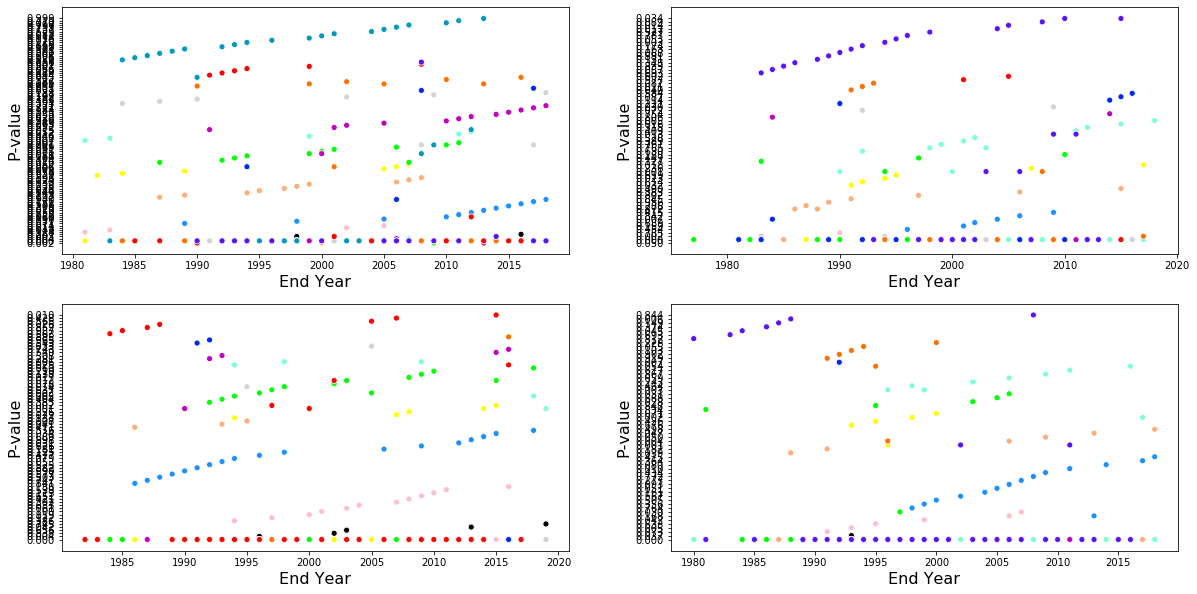

In [330]:
winter = i[(i.Season=="Winter" )] 
spring = i[(i.Season=="Spring")]
summer= i[(i.Season=="Summer")]
fall = i[(i.Season=="Fall")]

fig, a = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(winter.EndYear,winter['P-value'],hue=winter.Region,ax = a[0,0])
sns.scatterplot(fall.EndYear,fall['P-value'],hue=fall.Region,ax = a[0,1])
sns.scatterplot(spring.EndYear,spring['P-value'],hue=spring.Region,ax = a[1,0])
sns.scatterplot(summer.EndYear,summer['P-value'],hue=summer.Region,ax=a[1,1])
for x,ax in enumerate(fig.axes): 
    ax.set_xlabel('End Year',fontsize=16);
    ax.set_ylabel('P-value',fontsize=16)
    ax.get_legend().remove()
   # ax.set_ylim([0,1]);ax.set_ylim([0,1])

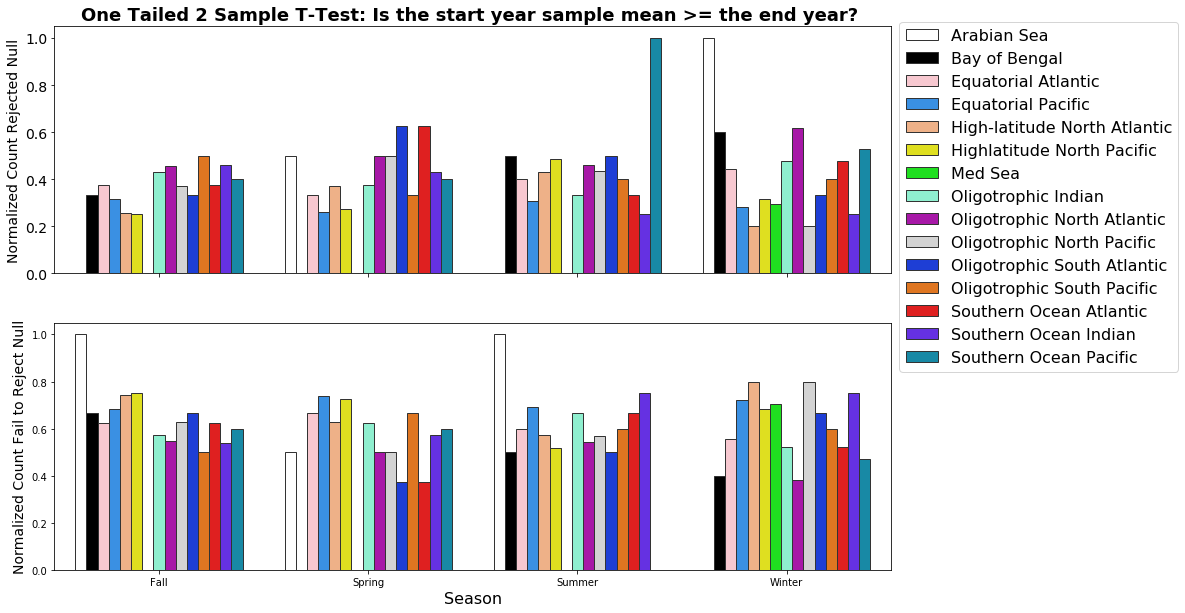

In [425]:
colors = ['white','black','pink', 'dodgerblue','#ffae77', 'yellow', 'lime','aquamarine' ,'m', 'lightgrey', '#002af3', '#ff7201','red', 
        '#5914ff',  '#0098bc']
# Set your custom color palette
c=sns.set_palette(sns.color_palette(colors))
fig, (a1,a2) = plt.subplots(2,1,figsize=(15,10),sharex=True)
sns.barplot(data=re2,x='Season',y='RejectSTARTYR>=EndYear',hue='Region',ax = a1, errcolor=".2", edgecolor=".2",
           palette=c)
sns.barplot(data=re2,x='Season',y='STARTYR>=End Year',hue='Region',ax=a2, errcolor=".2", edgecolor=".2")
a1.legend(bbox_to_anchor=(1.,1.05),fontsize=16)
a2.get_legend().remove()
a2.set_xlabel('Season',fontsize=16);a1.set_xlabel('')
a1.set_ylabel('Normalized Count Rejected Null',fontsize=14)
a2.set_ylabel('Normalized Count Fail to Reject Null',fontsize=14)
a1.tick_params(axis='both', which='major', labelsize=14)
a1.set_title('One Tailed 2 Sample T-Test: Is the start year sample mean >= the end year? ',fontsize=18,fontweight='bold');

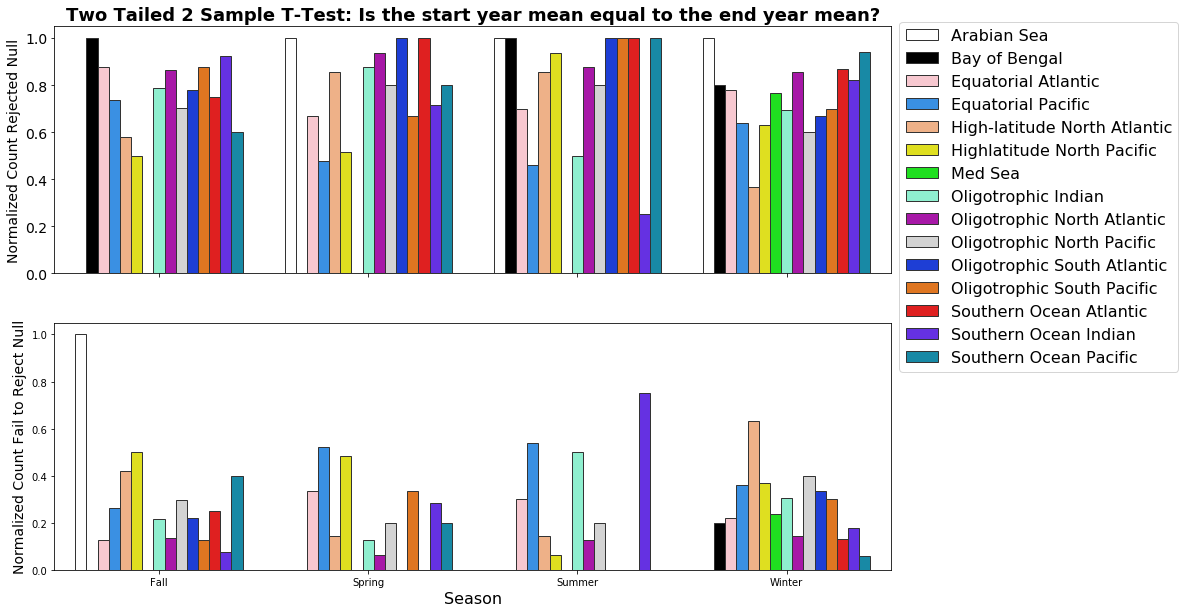

In [423]:
colors = ['white','black','pink', 'dodgerblue','#ffae77', 'yellow', 'lime','aquamarine' ,'m', 'lightgrey', '#002af3', '#ff7201','red', 
        '#5914ff',  '#0098bc']
# Set your custom color palette
c=sns.set_palette(sns.color_palette(colors))
fig, (a1,a2) = plt.subplots(2,1,figsize=(15,10),sharex=True)
sns.barplot(data=re,x='Season',y='!=Count',hue='Region',ax = a1, errcolor=".2", edgecolor=".2",
           palette=c)
sns.barplot(data=re,x='Season',y='=Count',hue='Region',ax=a2, errcolor=".2", edgecolor=".2")
a1.legend(bbox_to_anchor=(1.,1.05),fontsize=16)
a2.get_legend().remove()
a2.set_xlabel('Season',fontsize=16);a1.set_xlabel('')
a1.set_ylabel('Normalized Count Rejected Null',fontsize=14)
a2.set_ylabel('Normalized Count Fail to Reject Null',fontsize=14)
a1.tick_params(axis='both', which='major', labelsize=14)
a1.set_title('Two Tailed 2 Sample T-Test: Is the start year mean equal to the end year mean?',fontsize=18,fontweight='bold');